## Comparison between precipitation features and convective cells based on CTT 

**Notes:** 
    

*Method section*

- lifetime: tb cold, smallscale
- seasonal curve: all, TP, outside of TP
- area: tb cold, small scale 
- total nr of tracks 


*Spatial and Temporal characteristics*

- distribution for propagation speed, lifetime, area and seasonal curve for classes
- density plots for four classes 



*Precipitation*

- plot with contribution of total precip > 3000m, from heavy precip > 5mm which are non contiguous/isolated (local precip), contiguous in space (at least 10 pixels), contiguous in space and time (10 pixels and 3 hours), incorporated in precipitating cloud system (combined tracking) 




**TODO**

- wait for finished ptracking and tracking 
- include smallscale tracking 
- TP mask 
- function for density plots 
- function for precipitation feature analysis 


## get tracks for one year 

In [56]:
# read in precip tracks 
y= 2001


precipfile = '/media/juli/Elements/gpm_v06/Save/2000_2019/Tracks_precipitation_GPM_'+ str(y) + '.h5'
preciptracks= pd.read_hdf(precipfile, 'table')
preciptracks = ptracks[ptracks.cell >= 0]
preciptracks.timestr = pd.to_datetime(preciptracks.timestr)

# read in CTT tracks heavy rain core 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+str(y)+'_heavyraincorefiltered.h5'
tbbtracks= pd.read_hdf(tbb, 'table')
tbbtracks.timestr = pd.to_datetime(tbbtracks.timestr)


# read in CTT tracks cold core 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+ str(y)+'_cold_core.h5'
tbbcold= pd.read_hdf(tbb, 'table')
tbbcold.timestr = pd.to_datetime(tbbcold.timestr)


# read in CTT tracks only tbb 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks__'+ str(y)+'.h5'
tbb= pd.read_hdf(tbb, 'table')
tbb.timestr = pd.to_datetime(tbb.timestr)

## get tracks for all years : 2000 - 2019 

In [202]:
# read in cells from precip tracking 
import numpy as np 
import pandas as pd 

years = np.arange(2002,2008)

for y in years:
    print(y)
    # read in precip tracks 
    f = '/media/juli/Elements/gpm_v06/Save/2000_2019/Tracks_precipitation_GPM_'+ str(y) + '.h5'
    ptracks= pd.read_hdf(f, 'table')
    # remove nan values to only save the linked features                                                                                                       
    ptracks = ptracks[ptracks.cell >= 0]
    ptracks.timestr = pd.to_datetime(ptracks.timestr)
    preciptracks = preciptracks.append(ptracks)
    
     # read in CTT tracks heavy rain core 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+str(y)+'_heavyraincorefiltered.h5'
    tbhtracks= pd.read_hdf(f, 'table')
    tbhtracks.timestr = pd.to_datetime(tbhtracks.timestr)
    tbbtracks = tbbtracks.append(tbhtracks)


    # read in CTT tracks cold core 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+ str(y)+'_cold_core.h5'
    tbccold= pd.read_hdf(f, 'table')
    tbccold.timestr = pd.to_datetime(tbccold.timestr)
    tbbcold = tbbcold.append(tbccold)


    # read in CTT tracks only tbb 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks__'+ str(y)+'.h5'
    tb= pd.read_hdf(f, 'table')
    tb.timestr = pd.to_datetime(tb.timestr)   
    tbb.append(tb)

2002


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2003
2004
2005
2006
2007


## get cells for one season

In [36]:
# get only summer cells 
tracks = preciptracks
for i in np.unique(tracks.time.values):
    if i.month not in [6,7, 8]:
        tracks.drop(tracks.loc[tracks['time']== i].index, inplace=True)

In [37]:
summertracks = tracks 
summertracks.to_hdf('/media/juli/Elements/gpm_v06/Save/Tracks_GPM_2000_2019_JJA.h5', 'table')
n= np.unique(summertracks.timestr).shape[0]
n / (48*90*20) * 100

40.58796296296296

## Diurnal cycle 

In [6]:
# function to get seasonal curve of tracks
def get_diurnal_cycle(preciptracks):
    preciptracks['hour']= preciptracks.timestr.dt.hour
    diurnal=[]
    for h in np.arange(0,23):
        count = preciptracks[preciptracks.hour == h].shape[0]
        #meanvalue= np.nanmean(preciptracks.total_precip.values)
        diurnal.append(count)
    return diurnal

In [7]:
# get dataframe with max values 

def get_max_values(tracks):
    peak_frame = pd.DataFrame(columns = tracks.columns)
    for cell in np.unique(tracks.cell.values):
        subset= tracks[tracks.cell == cell]
        peak = np.nanmax(subset.total_precip.values)
        rain_peak = subset[subset.total_precip == peak]
        # add row to dataframe 
        peak_frame = pd.concat([peak_frame, rain_peak ], ignore_index=True)
    return peak_frame


In [9]:
mcs_precip= get_max_values(tbbtracks)

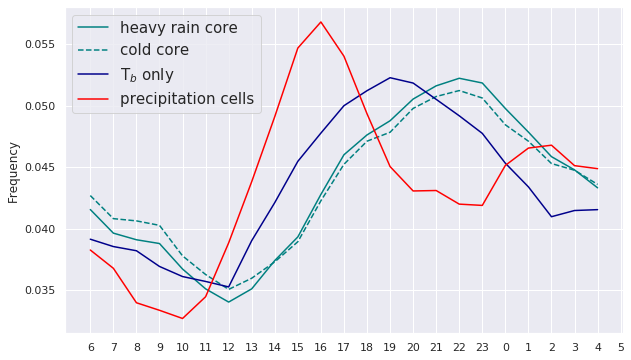

In [11]:
diurnal_precip = get_diurnal_cycle(preciptracks)
diurnal_tbb_rain= get_diurnal_cycle(tbbtracks)
diurnal_tbb_cold= get_diurnal_cycle(tbbcold)
diurnal_tbb= get_diurnal_cycle(tbb)
max_precip = get_diurnal_cycle(mcs_precip)


import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()


a= np.arange(0,18) + 6 
b= np.arange(0,6)
localtime= np.append(a, b)


plt.figure(figsize=(10,6))

plt.plot(diurnal_tbb_rain/ np.nansum(diurnal_tbb_rain), label = 'heavy rain core ', color= 'teal')
plt.plot(diurnal_tbb_cold/ np.nansum(diurnal_tbb_cold), label = 'cold core', color= 'teal', linestyle='--')
plt.plot(diurnal_tbb/ np.nansum(diurnal_tbb), label = 'T$_b$ only', color= 'darkblue')

#plt.plot(max_precip/np.nansum(max_precip), label = 'max precip', color= 'darkred')

plt.plot(diurnal_precip/np.nansum(diurnal_precip), label = 'precipitation cells', color= 'red')
plt.legend(fontsize= 15)

plt.xticks(np.arange(0,24), labels= localtime.astype(str))


plt.ylabel('Frequency')
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/diurnal_cycle_tracking_methods.png')
plt.show()


## Get total track numbers : outside and over plateau 

maybe also divide between entirely or partly within 3000 m boundary 

In [216]:
tbbtracks_tp= tbbtracks[tbbtracks.tp_flag > 0]

print('TP', tbbtracks_tp.shape[0]/20)
print(tbbtracks.shape[0] /20)
print(tbbcold.shape[0]/20)
print(tbbcold.shape[0]/20)
print(preciptracks.shape[0] /20)

TP 490.05
9286.15
9693.25
9693.25
79694.15


In [193]:
tracks = tbbtracks 


from scipy import ndimage
from scipy.ndimage import generate_binary_structure
s= generate_binary_structure(2,2)


def plateau_mask(tracks):

removed = 0
tracks['tp_flag'] = 0 

    # loop through cells 
    for cell in np.unique(tracks.cell.values):
        subset = tracks[tracks.cell == cell]
        print('checking heavy rain cores for cell:', cell, subset.shape)
        tp_flag = 0 
        # loop through timesteps of features for specific cell 
        for idx in subset.idx.values: 
            # idx is the timestep index for respective timestep or mask file 

            # open corresponding precip and mask file 
            year = subset.time.values[0].year 
            month = subset.time.values[0].month
            if len(str(month))== 1: 
                month= '0' + str(month)

            # check whether segmented feature is in area above 3000 m 
            maskfile = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Mask_Segmentation_'+str(year) + str(month) + '.nc'
            mask = xr.open_dataarray(maskfile)
            mask= mask[:,1:,1:].T

            # get right timestep frames 
            seg= mask[:,:,idx]

            # get write features from segmentation mask 
            labels, nr = ndimage.label(seg, structure = s)
            if featureid in seg:
                label = np.unique(labels[ seg == featureid])[0]
                seg_mask = seg.where(labels == label)
                # create mask as coordinates                                                                                                               
                seg_mask.coords['mask'] = (('lon', 'lat'), seg_mask)


                # get feature ID for frame 
                featureid= subset.feature[subset.idx== idx].values[0]

                # Elevation mask                                                                                                                           
                elevation_values = dem_mask.where(seg_mask.coords['mask'].values > 1)
                arr= elevation_values.values.flatten()
                values = arr[~np.isnan(arr)]     

                mountain_features = values[values >=3000].shape[0]
                tracks['tp_flag'][tracks.feature == featureid] =  mountain_features

                if mountain_features == 0 : 
                    tracks = tracks.drop(tracks[tracks.cell == cell].index)
                else:
                    tracks['tp_flag'][tracks.feature == featureid] =  mountain_features
                    
    return tracks 
            
tracks.to_hdf(os.path.join(savedir,'Tracks_tbb_TPflag.h5'),'table')    

checking heavy rain cores for cell: 4413.0 (15, 19)


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


checking heavy rain cores for cell: 4788.0 (36, 19)
checking heavy rain cores for cell: 4888.0 (15, 19)
checking heavy rain cores for cell: 4891.0 (13, 19)
checking heavy rain cores for cell: 4920.0 (14, 19)
checking heavy rain cores for cell: 4986.0 (14, 19)
checking heavy rain cores for cell: 5012.0 (15, 19)
checking heavy rain cores for cell: 5020.0 (26, 19)
checking heavy rain cores for cell: 5035.0 (14, 19)
checking heavy rain cores for cell: 5103.0 (22, 19)
checking heavy rain cores for cell: 5105.0 (20, 19)
checking heavy rain cores for cell: 5177.0 (40, 19)
checking heavy rain cores for cell: 5219.0 (22, 19)
checking heavy rain cores for cell: 5227.0 (15, 19)
checking heavy rain cores for cell: 5281.0 (23, 19)
checking heavy rain cores for cell: 5314.0 (25, 19)
checking heavy rain cores for cell: 5379.0 (18, 19)
checking heavy rain cores for cell: 5409.0 (27, 19)
checking heavy rain cores for cell: 5454.0 (19, 19)
checking heavy rain cores for cell: 5503.0 (23, 19)
checking hea

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/juli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

checking heavy rain cores for cell: 6589.0 (13, 19)


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater


checking heavy rain cores for cell: 6613.0 (22, 19)
checking heavy rain cores for cell: 6626.0 (54, 19)
checking heavy rain cores for cell: 6628.0 (13, 19)
checking heavy rain cores for cell: 6632.0 (14, 19)
checking heavy rain cores for cell: 6657.0 (38, 19)
checking heavy rain cores for cell: 6659.0 (23, 19)
checking heavy rain cores for cell: 6669.0 (34, 19)
checking heavy rain cores for cell: 6671.0 (19, 19)
checking heavy rain cores for cell: 6674.0 (18, 19)
checking heavy rain cores for cell: 6681.0 (33, 19)
checking heavy rain cores for cell: 6683.0 (14, 19)
checking heavy rain cores for cell: 6691.0 (13, 19)
checking heavy rain cores for cell: 6693.0 (48, 19)
checking heavy rain cores for cell: 6705.0 (13, 19)
checking heavy rain cores for cell: 6708.0 (21, 19)
checking heavy rain cores for cell: 6729.0 (15, 19)
checking heavy rain cores for cell: 6741.0 (45, 19)
checking heavy rain cores for cell: 6742.0 (13, 19)
checking heavy rain cores for cell: 6751.0 (16, 19)
checking hea

KeyboardInterrupt: 

## Seasonal cycle 

In [36]:
# function to get seasonal curve of tracks

def get_seasonal_cycle(preciptracks):
    preciptracks['month']= preciptracks.timestr.dt.month
    seasonal=[]
    for m in np.arange(1,13):
        monthly_count = preciptracks[preciptracks.month== m].shape[0]   # for frequency 
        #meanvalue= np.nanmean(preciptracks.total_precip.values)    # for mean values of specific variable 
        seasonal.append(monthly_count)
    return seasonal

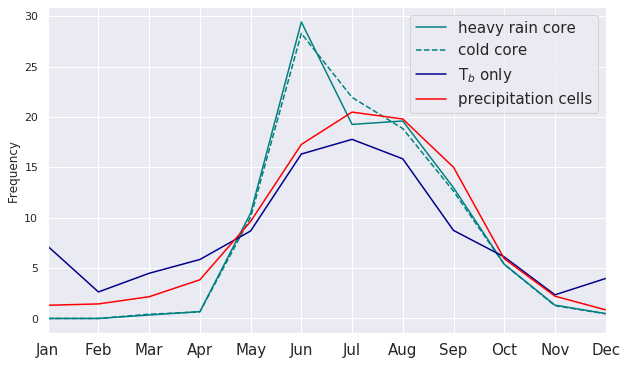

In [183]:
seasonal_precip = get_seasonal_cycle(preciptracks)
seasonal_tbb_rain= get_seasonal_cycle(tbbtracks)
seasonal_tbb_cold= get_seasonal_cycle(tbbcold)
seasonal_tbb= get_seasonal_cycle(tbb)


import seaborn as sns 
sns.set()


plt.figure(figsize=(10,6))

plt.plot(seasonal_tbb_rain/ np.nansum(seasonal_tbb_rain)*100, label = 'heavy rain core ', color= 'teal')
plt.plot(seasonal_tbb_cold/ np.nansum(seasonal_tbb_cold)*100, label = 'cold core', color= 'teal', linestyle='--')
plt.plot(seasonal_tbb/ np.nansum(seasonal_tbb)*100, label = 'T$_b$ only', color= 'darkblue')
plt.plot(seasonal_precip/np.nansum(seasonal_precip)*100, label = 'precipitation cells', color= 'red')
plt.legend(fontsize= 15)

plt.xticks(np.arange(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], fontsize = 15)
plt.xlim(0,11)
plt.ylabel('Frequency')
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/seasonal_cycle_tracking_methods_entiredomain.png')
plt.show()

##  lifetime histogram 

In [38]:
def get_lifetime(tracks):
    lt= []
    for cell in np.unique(tracks.cell.values):
        hours= tracks[tracks.cell== cell].shape[0] * 0.5
        lt.append(hours)
    lt = np.array(lt)
    lt= np.histogram(lt, bins=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))
    print('lifetime histo calculated.')
    return lt

## remove all short-lived precipitation cells to compare lifetime histograms

In [44]:
def get_lifetime(tracks):
    lt= []
    for cell in np.unique(tracks.cell.values):
        hours= tracks[tracks.cell== cell].shape[0] * 0.5
        if hours >=6:
            lt.append(hours)
    lt = np.array(lt)
    lt= np.histogram(lt, bins=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))
    print('lifetime histo calculated.')
    return lt

lt_precip= get_lifetime(preciptracks)

lifetime histo calculated.


In [39]:
lt_precip= get_lifetime(preciptracks)
lt_tbb_rain= get_lifetime(tbbtracks)
lt_tbb_cold= get_lifetime(tbbcold)
lt_tbb= get_lifetime(tbb)

lifetime histo calculated.
lifetime histo calculated.
lifetime histo calculated.
lifetime histo calculated.


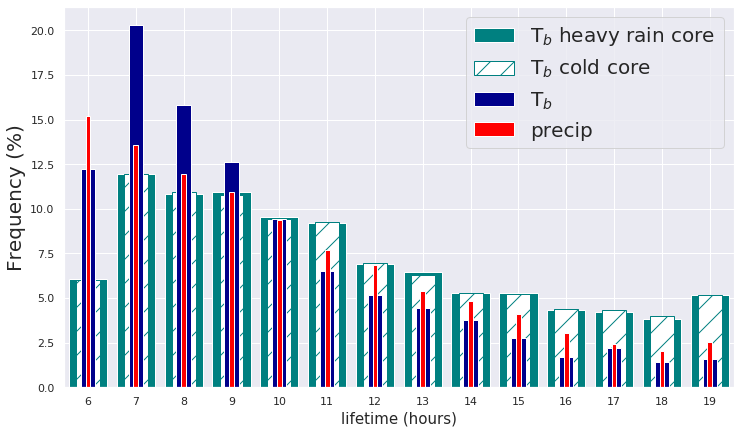

In [93]:
bins = lt_precip[1]
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set()


plt.figure(figsize=(12,7))


plt.bar(bins[:-1] , lt_tbb_rain[0]/ np.nansum(lt_tbb_rain[0])*100, label= 'T$_b$ heavy rain core', width=0.8,color= 'teal')
plt.bar(bins[:-1] , lt_tbb_cold[0]/ np.nansum(lt_tbb_cold[0])*100, label = 'T$_b$ cold core', width = 0.5,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(bins[:-1] , lt_tbb[0]/ np.nansum(lt_tbb[0])*100, label= 'T$_b$', width= 0.3, color= 'darkblue')
plt.bar(bins[:-1] , lt_precip[0]/ np.nansum(lt_precip[0])*100, label='precip', width = 0.1, color= 'red')

plt.legend(fontsize= 20)


plt.xticks(bins[:])
plt.xlim(5.5, 19.5)
plt.xlabel('lifetime (hours)', fontsize= 15)
plt.ylabel('Frequency (%)', fontsize= 20)

plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/lifetime_trackingmethods.png')
plt.show()

## Area distribution 

In [174]:
def get_area(tracks):
    a= []
    for cell in np.unique(tracks.cell.values):
        area= np.nanmean(tracks[tracks.cell== cell].ncells.values)
        a.append(area)
    a = np.array(a)
    a = np.histogram(a, bins=(50, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000))
    print('area histo calculated.')
    return a

In [175]:
a_precip= get_area(preciptracks)
a_tbb_rain= get_area(tbbtracks)
a_tbb_cold= get_area(tbbcold)
a_tbb= get_area(tbb)

area histo calculated.
area histo calculated.
area histo calculated.
area histo calculated.


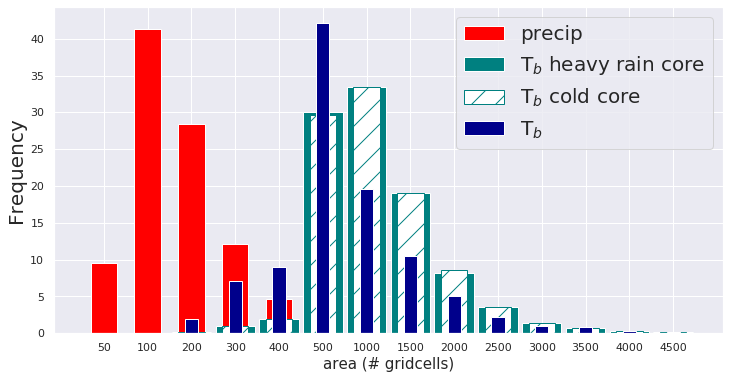

In [182]:
bins = a_tbb[1]
plt.figure(figsize=(12,6))

ticks =np.arange(14)

plt.bar(ticks , a_precip[0]/ np.nansum(a_precip[0]) * 100 , label='precip', width = 0.6 , color= 'red')

plt.bar(ticks, a_tbb_rain[0]/ np.nansum(a_tbb_rain[0]) * 100 , label= 'T$_b$ heavy rain core', width=0.9,color= 'teal')
plt.bar(ticks , a_tbb_cold[0]/ np.nansum(a_tbb_cold[0]) * 100 , label = 'T$_b$ cold core', width = 0.6  ,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(ticks , a_tbb[0]/ np.nansum(a_tbb[0]) * 100 , label= 'T$_b$', width= 0.3 , color= 'darkblue')

plt.legend(fontsize= 20)

plt.xticks(ticks , bins[:])
plt.xlabel('area (# gridcells)', fontsize= 15)
plt.ylabel('Frequency', fontsize= 20)

plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/area_trackingmethods.png')
plt.show()

## propagation speed and direction 

In [4]:
# calculate propagation speed (tobac can be used)
import tobac
preciptracks = tobac.calculate_velocity(preciptracks, method_distance=None)

In [16]:
# calculate area based on ncells 




In [324]:
# divide into north-moving, east-moving and other 

def propagation_dir(tracks):
    pd.options.mode.chained_assignment = None 
    
    tracks['dir'] = 0 
    for c in np.unique(tracks.cell.values):
        cell= tracks[tracks.cell == c]

        west_east= cell.longitude.values[-1] - cell.longitude.values[0]
        north_south = cell.latitude.values[-1] - cell.latitude.values[0]

        if north_south > west_east:
            if np.nanmean(cell.latitude.values[0:2]) < np.nanmean(cell.latitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'N'
            elif np.nanmean(cell.latitude.values[0:2]) > np.nanmean(cell.latitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'S'
                
        elif north_south < west_east:
            if np.nanmean(cell.longitude.values[0:2]) < np.nanmean(cell.longitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'E'
            elif np.nanmean(cell.longitude.values[0:2]) > np.nanmean(cell.longitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'W'
    return tracks 

In [327]:
print(tbb[tbb.dir=='N'].shape,tbb[tbb.dir=='E'].shape, tbb[tbb.dir=='W'].shape, tbb[tbb.dir=='S'].shape)

(16616, 16) (26189, 16) (6152, 16) (9635, 16)


In [325]:
#  separate tracks based on propagation direction, thresholds for intensity, and TP domain vs. surrounding 
tbb = propagation_dir(tbb)

## Contribution to total precipitation 

1. Seasonal curve with contribution to total precipitation, TP vs outside of TP, fraction of convective precip

! fix months for which timestep shape is not equal 
! combine with precip from GPM: fraction of total precip 
 


In [54]:
# get total precipitation from GPM within TP 3000 m boundary 

tp_precip = '/media/juli/Data/projects/mcs_tracking/CTT/analysis/'



In [42]:
tp_tracks = tbbtracks[tbbtracks.tp_flag > 0]

In [69]:
# calculate precip amount per month 

tbbtracks['month']= tbbtracks.timestr.dt.month

seasonal_conv=[]
seasonal_tot=[]

for m in np.arange(1,13):
    p = tbbtracks[tbbtracks.month== m]
    total_precip= np.nansum(p.total_precip.values)
    convective_precip= np.nansum(p.convective_precip.values)
    seasonal_conv.append(convective_precip)
    seasonal_tot.append(total_precip)


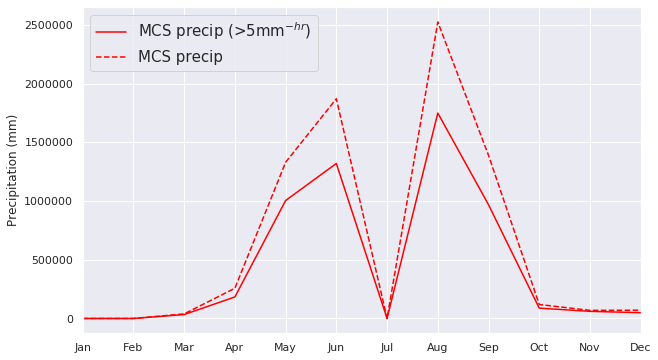

In [79]:
import seaborn as sns 
sns.set()

plt.figure(figsize=(10,6))

plt.plot(seasonal_conv, label = 'MCS precip (>5mm$^{-hr}$)', color= 'red')
plt.plot(seasonal_tot, label = 'MCS precip', color= 'red', linestyle='--')

plt.legend(fontsize= 15)

plt.xticks(np.arange(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
plt.xlim(0,11)
plt.ylabel('Precipitation (mm)')



plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/contribution_to_precip.png')
plt.show()


## Basic characterics 

In [ ]:
# density plot of spatial distribution 

In [ ]:
# density intitiation vs. dissipation 

## What is the maximum elevation for cells ? 

## Trends of convective cells in TP region, any change in the past two decades? 